# Question no 1

C:\Users\Uzair\AppData\Local\Temp\ipykernel_7936\2961942619.py:23: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std


Training Accuracy: 9.87%
Test Accuracy: 9.80%


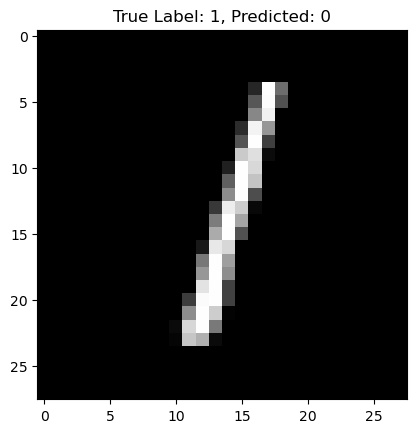

In [11]:
import numpy as np
import struct
import matplotlib.pyplot as plt

def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
    return images

def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

def scale_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y, reg_param):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1/m) * (-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (reg_param / (2*m)) * np.sum(np.square(theta[1:]))
    return cost

def gradient(theta, X, y, reg_param):
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = (1/m) * X.T.dot(h - y)
    grad[1:] += (reg_param / m) * theta[1:]
    return grad

def gradient_descent(X, y, initial_theta, learning_rate, num_iterations, reg_param):
    theta = initial_theta
    for i in range(num_iterations):
        grad = gradient(theta, X, y, reg_param)
        theta -= learning_rate * grad
    return theta

def train_svm(X, y, num_labels, reg_param, learning_rate=0.1, num_iterations=100):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.c_[np.ones((m, 1)), X]
    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        y_c = np.where(y == c, 1, 0)
        all_theta[c] = gradient_descent(X, y_c, initial_theta, learning_rate, num_iterations, reg_param)
    return all_theta

def predict(all_theta, X):
    m = X.shape[0]
    X = np.c_[np.ones((m, 1)), X]
    predictions = np.argmax(X.dot(all_theta.T), axis=1)
    return predictions

train_images = load_images('train-images-idx3-ubyte')
train_labels = load_labels('train-labels-idx1-ubyte')
test_images = load_images('t10k-images-idx3-ubyte')
test_labels = load_labels('t10k-labels-idx1-ubyte')

X_train = train_images.reshape(train_images.shape[0], -1) / 255.0
X_test = test_images.reshape(test_images.shape[0], -1) / 255.0

X_train_scaled = scale_data(X_train)
X_test_scaled = scale_data(X_test)

num_labels = 10
reg_param = 0.1
all_theta = train_svm(X_train_scaled, train_labels, num_labels, reg_param)

train_preds = predict(all_theta, X_train_scaled)
train_accuracy = np.mean(train_preds == train_labels) * 100
print(f"Training Accuracy: {train_accuracy:.2f}%")

test_preds = predict(all_theta, X_test_scaled)
test_accuracy = np.mean(test_preds == test_labels) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

plt.imshow(test_images[2], cmap='gray')
plt.title(f"True Label: {test_labels[2]}, Predicted: {test_preds[2]}")
plt.show()


# Question no 2
# Part no (a)

Epoch 10/100, Loss: 2.2912244471949994
Epoch 20/100, Loss: 2.269593165576758
Epoch 30/100, Loss: 2.223834173207992
Epoch 40/100, Loss: 2.1318987557183173
Epoch 50/100, Loss: 1.9716100093884399
Epoch 60/100, Loss: 1.7407433914532655
Epoch 70/100, Loss: 1.4800455729323752
Epoch 80/100, Loss: 1.2490049236737724
Epoch 90/100, Loss: 1.0714442430785753
Epoch 100/100, Loss: 0.940082844430789
Test Accuracy: 79.49%


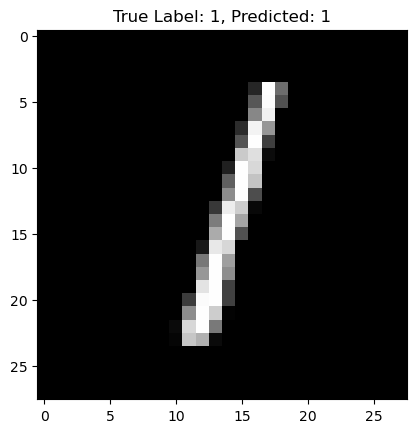

In [13]:
import numpy as np
import struct
import matplotlib.pyplot as plt

def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
    return images

def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    m = len(y_true)
    log_likelihood = -np.log(y_pred[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    return loss

def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        dZ2 = self.A2 - one_hot(y, 10)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X_train, y_train, num_epochs, learning_rate):
        for epoch in range(num_epochs):
            y_pred = self.forward(X_train)
            loss = cross_entropy_loss(y_train, y_pred)
            self.backward(X_train, y_train, learning_rate)
            if (epoch + 1) % 10 == 0:
                print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss}')

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

train_images = load_images('train-images-idx3-ubyte')
train_labels = load_labels('train-labels-idx1-ubyte')
test_images = load_images('t10k-images-idx3-ubyte')
test_labels = load_labels('t10k-labels-idx1-ubyte')

X_train = train_images.reshape(train_images.shape[0], -1) / 255.0
X_test = test_images.reshape(test_images.shape[0], -1) / 255.0

input_size = 784
hidden_size = 128
output_size = 10
num_epochs = 100
learning_rate = 0.1

nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, train_labels, num_epochs, learning_rate)

test_preds = nn.predict(X_test)
test_accuracy = np.mean(test_preds == test_labels) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

plt.imshow(test_images[2], cmap='gray')
plt.title(f"True Label: {test_labels[2]}, Predicted: {test_preds[2]}")
plt.show()


# Part (b)

In [15]:
def conv2d(X, filters):
    filter_size = filters.shape[1]
    output = np.zeros((X.shape[0] - filter_size + 1, X.shape[1] - filter_size + 1, filters.shape[0]))
    for f in range(filters.shape[0]):
        for i in range(X.shape[0] - filter_size + 1):
            for j in range(X.shape[1] - filter_size + 1):
                output[i, j, f] = np.sum(X[i:i+filter_size, j:j+filter_size] * filters[f])
    return output

def max_pooling(X, pool_size=2):
    output = np.zeros((X.shape[0] // pool_size, X.shape[1] // pool_size, X.shape[2]))
    for i in range(0, X.shape[0], pool_size):
        for j in range(0, X.shape[1], pool_size):
            output[i//pool_size, j//pool_size] = np.max(X[i:i+pool_size, j:j+pool_size], axis=(0,1))
    return output

class CNN:
    def __init__(self):
        self.filters = np.random.randn(16, 5, 5) * 0.1
        self.fc_weights = np.random.randn(16 * 12 * 12, 128) * 0.1
        self.fc_bias = np.zeros(128)
        self.fc_output_weights = np.random.randn(128, 10) * 0.1
        self.fc_output_bias = np.zeros(10)

    def forward(self, X):
        conv_output = conv2d(X, self.filters)
        pooled_output = max_pooling(conv_output)
        flattened = pooled_output.flatten().reshape(1, -1)
        fc1 = np.dot(flattened, self.fc_weights) + self.fc_bias
        fc1 = relu(fc1)
        fc_output = np.dot(fc1, self.fc_output_weights) + self.fc_output_bias
        return softmax(fc_output)

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output)

cnn = CNN()
X_train = train_images[0]
output = cnn.forward(X_train)
pred = np.argmax(output)
print(f"Predicted label: {pred}")


Predicted label: 9
